In [1]:
import json

def append_to_model_output_file(task_id: int, prompt: str, research_report: str):
    """Append the model output to a JSONL file"""
    filename = "output_4.jsonl"
    model_output = {"id": task_id, "prompt": prompt, "article": research_report}

    try:
        with open(filename, "r") as file:
            existing_data = json.load(file)
    except FileNotFoundError:
        existing_data = []  # Initialize as an empty list if the file doesn't exist

    # Example for appending to a list within a dictionary
    if isinstance(existing_data, list):
        existing_data.append(model_output)

    with open(filename, "w") as file:
        json.dump(existing_data, file, indent=4, ensure_ascii=False)


In [2]:
with open('../output_final_report_1.md', "r") as file:
    report = file.read()

task_id = 52
prompt = 'What are the investment philosophies of Duan Yongping, Warren Buffett, and Charlie Munger?'
append_to_model_output_file(task_id=52, prompt=prompt, research_report=report)

In [5]:
import json

CHINESE_EVALS_PATH = "../../evals/chinese/raw_results.jsonl"
ENGLISH_EVALS_PATH = "../../evals/english/raw_results.jsonl"
OVERALL_EVALS_PATH = "../../evals/overall/raw_results.jsonl"
QUERY_PATH = "../../benchmark_query/query.jsonl"

def append_to_model_output_file(filepath):
    """Append the model output to a JSONL file"""
    try:
        existing_data = []
        with open(filepath, 'r', encoding='utf-8') as f:
            for line in f:
                # Strip whitespace and parse the JSON string
                json_object = json.loads(line.strip())
                existing_data.append(json_object)
    except FileNotFoundError as e:
        print("File not found. Creating a new one.", e)
        existing_data = []  # Initialize as an empty list if the file doesn't exist

    return existing_data


In [2]:
evals = append_to_model_output_file(OVERALL_EVALS_PATH)

comprehensiveness = 0.0
insight = 0.0
instruction_following = 0.0
readability = 0.0
overall_score = 0.0

for eval in evals:
    overall_score += eval['overall_score']
    insight += eval['insight']
    comprehensiveness += eval['comprehensiveness']
    instruction_following += eval['instruction_following']
    readability += eval['readability']

print(f'Comprehensiveness: {comprehensiveness/len(evals):.4f}')
print(f'Insight: {insight/len(evals):.4f}')
print(f'Instruction Following: {instruction_following/len(evals):.4f}')
print(f'Readability: {readability/len(evals):.4f}')
print(f'Overall Score: {overall_score/len(evals):.4f}')

Comprehensiveness: 0.3512
Insight: 0.3045
Instruction Following: 0.3886
Readability: 0.3544
Overall Score: 0.3472


In [6]:
evals = append_to_model_output_file(OVERALL_EVALS_PATH)
queries = append_to_model_output_file(QUERY_PATH)

In [10]:
evals[0]

{'id': 1,
 'prompt': '收集整理目前中国9阶层实际收入和财务状况，特别研究得出中国的中产有哪些特点，实际中产人数，财力等等',
 'comprehensiveness': 0.42569659442724456,
 'insight': 0.3413379073756433,
 'instruction_following': 0.5165745856353591,
 'readability': 0.3976109215017065,
 'overall_score': 0.4148322019920066}

In [8]:
id_by_topic = { item['id']:item['topic'] for item in queries}

In [11]:
topic_by_overall_score = {}
topic_by_comprehensiveness = {}
topic_by_insight = {}
topic_by_instruction_following = {}
topic_by_readability = {}

topic_by_count = {}

for eval in evals:
    topic = id_by_topic.get(eval['id'], 'Unknown Topic')
    if topic not in topic_by_overall_score:
        topic_by_overall_score[topic] = eval['overall_score']
        topic_by_comprehensiveness[topic] = eval['comprehensiveness']
        topic_by_insight[topic] = eval['insight']
        topic_by_instruction_following[topic] = eval['instruction_following']
        topic_by_readability[topic] = eval['readability']
        topic_by_count[topic] = 1
    else:
        topic_by_overall_score[topic] += eval['overall_score']
        topic_by_comprehensiveness[topic] += eval['comprehensiveness']
        topic_by_insight[topic] += eval['insight']
        topic_by_instruction_following[topic] += eval['instruction_following']
        topic_by_readability[topic] += eval['readability']
        topic_by_count[topic] += 1

In [13]:
for topic in topic_by_count.keys():
    overall_score_avg = topic_by_overall_score[topic] / topic_by_count[topic]
    comprehensiveness_avg = topic_by_comprehensiveness[topic] / topic_by_count[topic]
    insight_avg = topic_by_insight[topic] / topic_by_count[topic]
    instruction_following_avg = topic_by_instruction_following[topic] / topic_by_count[topic]
    readability_avg = topic_by_readability[topic] / topic_by_count[topic]

    print(f'Topic: {topic}')
    print(f'  Overall Score: {overall_score_avg:.4f}')
    print(f'  Comprehensiveness: {comprehensiveness_avg:.4f}')
    print(f'  Insight: {insight_avg:.4f}')
    print(f'  Instruction Following: {instruction_following_avg:.4f}')
    print(f'  Readability: {readability_avg:.4f}')

Topic: Finance & Business
  Overall Score: 0.3265
  Comprehensiveness: 0.3396
  Insight: 0.2835
  Instruction Following: 0.3673
  Readability: 0.3304
Topic: Science & Technology
  Overall Score: 0.3222
  Comprehensiveness: 0.3268
  Insight: 0.2928
  Instruction Following: 0.3507
  Readability: 0.3354
Topic: Software Development
  Overall Score: 0.3371
  Comprehensiveness: 0.3482
  Insight: 0.2878
  Instruction Following: 0.3716
  Readability: 0.3541
Topic: Education & Jobs
  Overall Score: 0.3568
  Comprehensiveness: 0.3593
  Insight: 0.3090
  Instruction Following: 0.4059
  Readability: 0.3650
Topic: Health
  Overall Score: 0.3922
  Comprehensiveness: 0.3883
  Insight: 0.3469
  Instruction Following: 0.4593
  Readability: 0.3790
Topic: Literature
  Overall Score: 0.3116
  Comprehensiveness: 0.2954
  Insight: 0.2343
  Instruction Following: 0.3909
  Readability: 0.3324
Topic: History
  Overall Score: 0.3960
  Comprehensiveness: 0.4089
  Insight: 0.3655
  Instruction Following: 0.4170
 

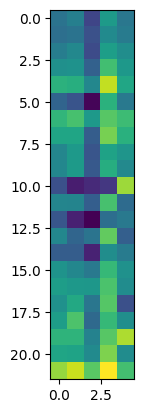

In [32]:
import numpy as np 
import matplotlib.pyplot as plt

topic_avg_scores = []
topic_names = topic_by_count.keys()
for topic in topic_names:
    overall_score_avg = topic_by_overall_score[topic] / topic_by_count[topic]
    comprehensiveness_avg = topic_by_comprehensiveness[topic] / topic_by_count[topic]
    insight_avg = topic_by_insight[topic] / topic_by_count[topic]
    instruction_following_avg = topic_by_instruction_following[topic] / topic_by_count[topic]
    readability_avg = topic_by_readability[topic] / topic_by_count[topic]
    topic_avg_scores.append(
        [
            overall_score_avg * 100.0, 
            comprehensiveness_avg * 100.0, 
            insight_avg * 100.0, 
            instruction_following_avg * 100.0, 
            readability_avg * 100.0
    ])

H = np.array(topic_avg_scores)

plt.imshow(H, interpolation='none')
plt.show()

In [29]:
H.T.shape

(5, 22)

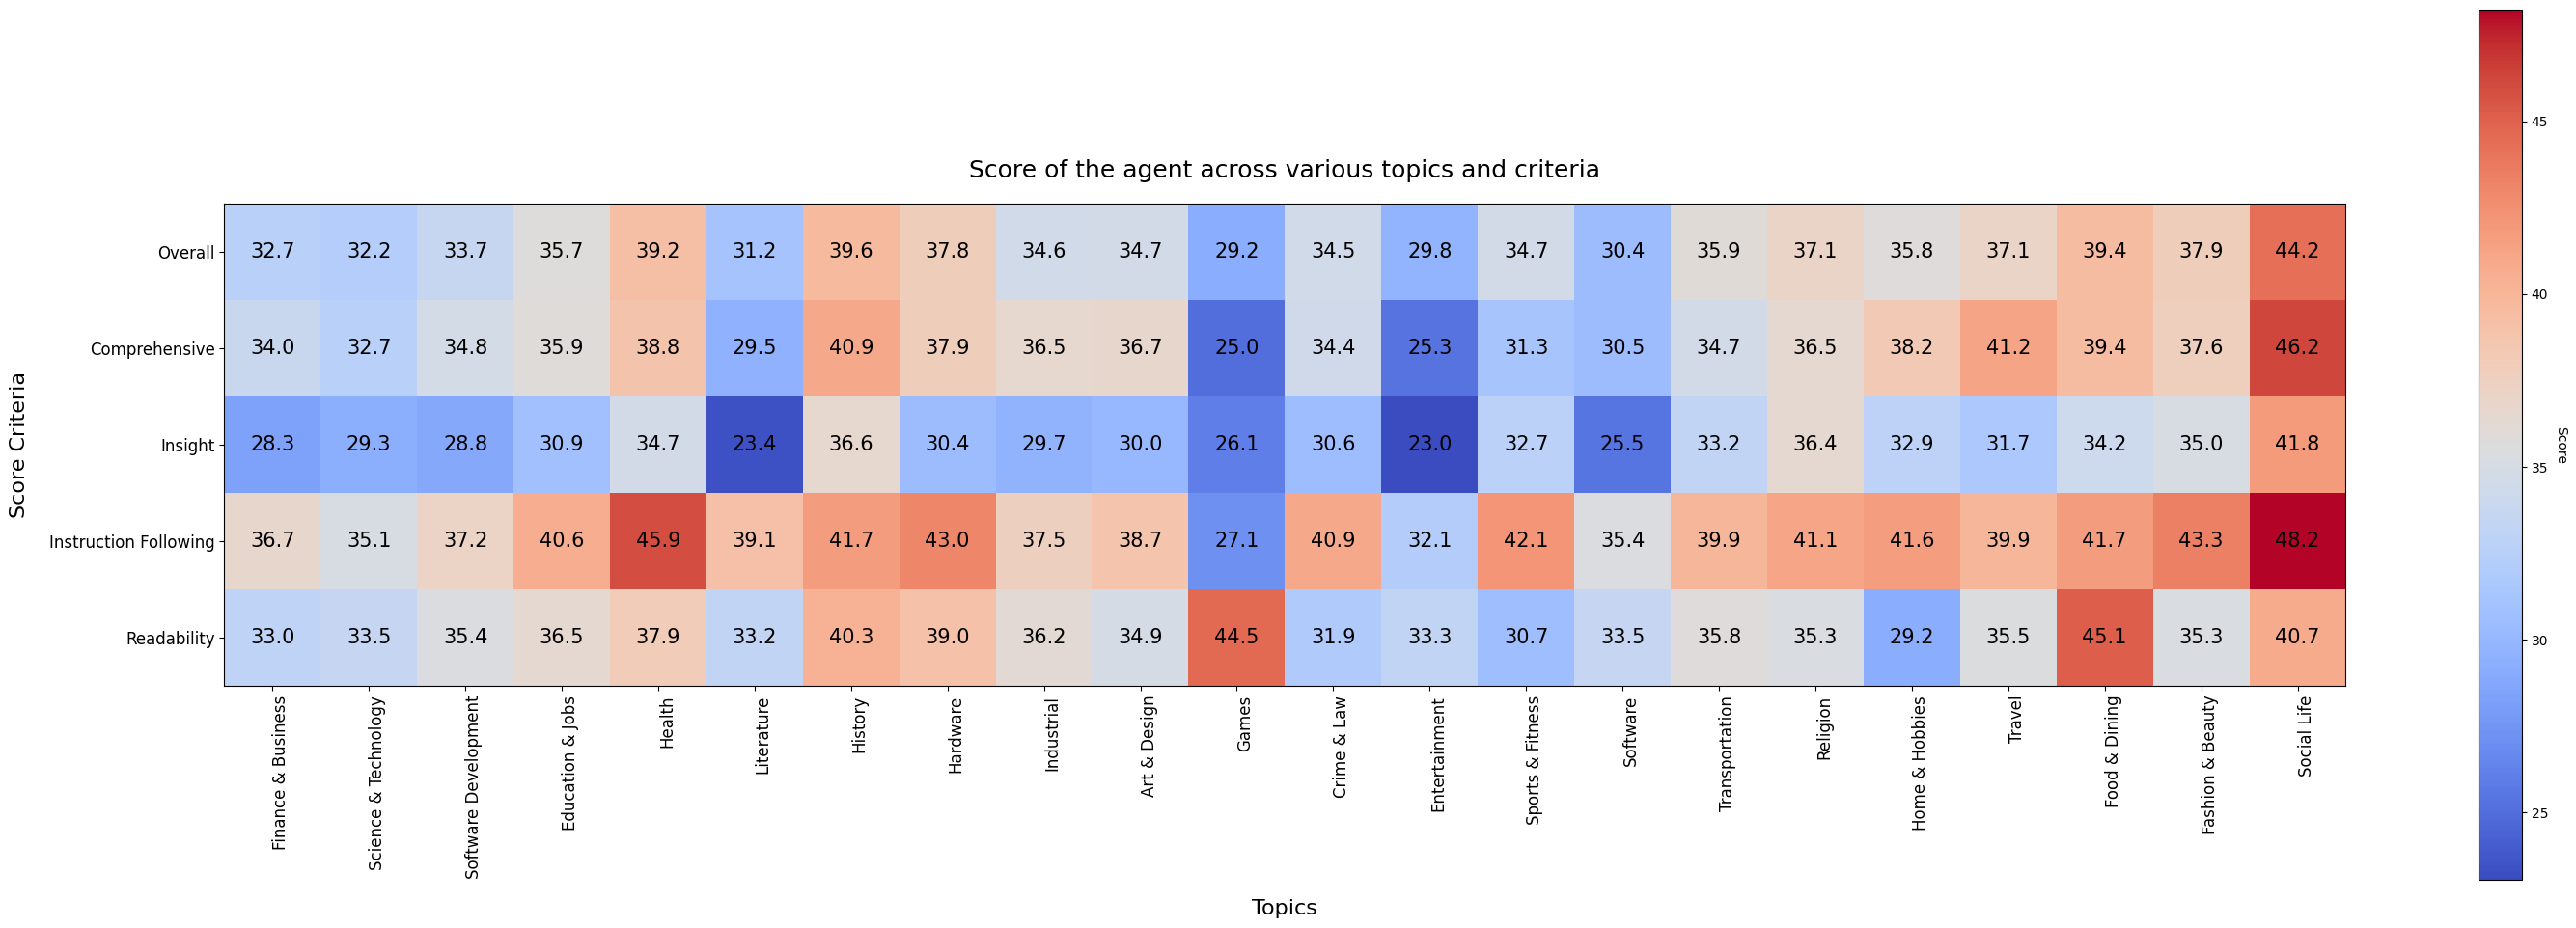

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Sample Data (replace with your actual data)
# Create a 5x4 grid of random data
data = np.array(topic_avg_scores).T  # 5 x 22

# Define the labels for rows and columns
row_labels = ['Overall', 'Comprehensive', 'Insight', 'Instruction Following', 'Readability']
col_labels = topic_names

# 2. Create the Figure and Axes
fig, ax = plt.subplots(figsize=(30, 10))

# 3. Create the heatmap
# 'cmap' sets the color map (e.g., 'Reds', 'coolwarm', 'viridis')
# 'interpolation' is set to 'nearest' to get sharp squares
im = ax.imshow(data, cmap='coolwarm', interpolation='nearest')

# 4. Add a Color Bar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Score', rotation=-90, va="bottom")

# 5. Set Ticks and Labels
# We want to show all ticks...
ax.set_xticks(np.arange(len(col_labels)))
ax.set_yticks(np.arange(len(row_labels)))
# ...and label them with the respective list entries
ax.set_xticklabels(col_labels)
ax.set_yticklabels(row_labels)

# Rotate the tick labels on the x-axis to be vertical
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

# 6. Loop over data and create text annotations
# This is the part that adds the numbers inside the squares
for i in range(len(row_labels)):
    for j in range(len(col_labels)):
        # Format the number to one decimal place
        text = ax.text(j, i, f'{data[i, j]:.1f}',
                       ha="center", va="center", color="black", fontsize=15)

ax.set_xlabel("Topics", fontsize=16, labelpad=15)
ax.set_ylabel("Score Criteria", fontsize=16, labelpad=15)

# b) Set the font size for the tick labels
ax.tick_params(axis='y', labelsize=12) # For the y-axis
ax.tick_params(axis='x', labelsize=12) # For the x-axis
ax.set_title("Score of the agent across various topics and criteria", fontsize=18, pad=20)

fig.tight_layout()  # Adjusts plot for better layout

# 7. Display the plot
plt.show()